# Sistema Multi-Agente Centralizado para Actividades de Monitoreo <img src="logo.png" align="right" width = "95px"/>
    
Alumnnos:
    - Eduardo Carrasco.
    - Argenis Chirinos.
    - Gustavo Jara.

Profesor Guía: Enrique Canessa. Facultad de Ingeniería y Ciencias, UAI.
 
![Python](https://img.shields.io/badge/python-%2314354C.svg)![GitHub](https://img.shields.io/badge/github-%23121011.svg)

# Descripción del modelo:

Si tomamos la condición actual (con uso de bote) como un modelo previo (**antes**), e implementamos un modelo con drones (**despues**). Para poder decidir sí a la implementación del modelo, se selecciona los TMI obtenidos de la simuñación de ambos modelos, con uso de botes y con uso de drones. 
En vista de los datos obtenidos ¿Hay diferencia significativa entre el rendimiento de ambos modelos?

## Hipótesis

- 𝐻0 : no hay diferencia entre el tiempo medio entre el modelo de botes y el modelo de drones. El promedio de las diferencias es cero ( 𝜇𝑑=0 ).
- 𝐻𝑎 : sí hay diferencia entre el tiempo medio entre el modelo de botes y el modelo de drones. El promedio de las diferencias no es cero ( 𝜇𝑑≠0 ).

## Estadístico observado

El estadístico es el valor que se calcula a partir de la muestra y que se quiere extrapolar a la población de origen. En este caso, es el promedio de las diferencias entre cada par de observaciones  𝑑⎯⎯⎯=−0.5 .

In [1]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196190 sha256=145c3b648e0874fb07c02ab8cc4d7787bbffc1df41f821a225f8e2d71dc2eb44
  Stored in directory: /Users/educarrascovidal/Library/Caches/pip/wheels/c0/9f/92/4c574395e1e8e5e08cf73dcb76815a7eaa62921833b6b0f6ad
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=7388b220f3fd87f56c1ba94ccc297080cc6cf28f49af892c6a5b4a9308b98fd6
  Stored in directory: /Users/educarrascovidal/Library/Caches/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built pingouin littleutils
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [41]:
datos_drones = pd.read_csv('Drones.csv', sep=';', decimal=",")
datos_drones.rename(columns = {'TMI':'TMI_despues'}, inplace = True)
datos_drone_2 = datos_drones.iloc[0:30,:]
print(datos_drone_2)

    Embarcaciones  Drones  Prob. de falla  TMI_despues
0              15       1             0.0       133.87
1              15       1             0.0       101.60
2              15       1             0.0        99.80
3              15       1             0.0       122.27
4              15       1             0.0       123.13
5              15       1             0.0       101.93
6              15       1             0.0       136.20
7              15       1             0.0       126.20
8              15       1             0.0       105.27
9              15       1             0.0       106.53
10             15       1             0.0       114.40
11             15       1             0.0        92.40
12             15       1             0.0       102.47
13             15       1             0.0       112.67
14             15       1             0.0        82.93
15             15       1             0.0       127.67
16             15       1             0.0        89.53
17        

In [44]:
datos_bote = pd.read_csv('Bote2.csv', sep=';', decimal=",")
datos_bote.rename(columns = {'TMI':'TMI_antes'}, inplace = True)
datos_bote_2 = datos_bote.iloc[0:30,:]
print(datos_bote_2)

    Embarcaciones  Botes  Tiempo de navegacion  TMI_antes
0              15      1                  2220     148.00
1              15      1                  4275     285.00
2              15      1                  5093     339.53
3              15      1                  2943     196.20
4              15      1                  6297     419.80
5              15      1                  6407     427.13
6              15      1                  4294     286.27
7              15      1                  4136     275.73
8              15      1                  3594     239.60
9              15      1                  6134     408.93
10             15      1                  7724     514.93
11             15      1                  4171     278.07
12             15      1                  5779     385.27
13             15      1                  4764     317.60
14             15      1                  3203     213.53
15             15      1                  3036     202.40
16            

In [46]:
datos = pd.concat([datos_bote_2, datos_drone_2], axis=1)
display(datos)

,Embarcaciones,Botes,Tiempo de navegacion,TMI_antes,Embarcaciones,Drones,Prob. de falla,TMI_despues
0,15,1,2220,148.00,15,1,0.0,133.87
1,15,1,4275,285.00,15,1,0.0,101.60
2,15,1,5093,339.53,15,1,0.0,99.80
3,15,1,2943,196.20,15,1,0.0,122.27
4,15,1,6297,419.80,15,1,0.0,123.13
...,...,...,...,...,...,...,...,...
25,15,1,7555,503.67,15,1,0.0,94.20
26,15,1,4295,286.33,15,1,0.0,133.80
27,15,1,4239,282.60,15,1,0.0,95.60
28,15,1,3731,248.73,15,1,0.0,99.27


In [47]:
# ingresar la desviación standar y la media  de ambos valores (antes y después).
datos.iloc[:,3].describe() #observamos las desviaciones estandar

count     30.000000
mean     307.197667
std       93.545326
min      148.000000
25%      244.020000
50%      285.635000
75%      358.167500
max      514.930000
Name: TMI_antes, dtype: float64

In [48]:
datos.iloc[:,7].describe() #observamos las desviaciones estandar

count     30.000000
mean     111.680333
std       15.912896
min       82.930000
25%      100.250000
50%      110.635000
75%      122.915000
max      139.330000
Name: TMI_despues, dtype: float64

Al tratarse de datos pareados, interesa conocer la diferencia.

In [49]:
datos['diferencia'] = datos['TMI_antes'] - datos['TMI_despues']
datos.head(10)

,Embarcaciones,Botes,Tiempo de navegacion,TMI_antes,Embarcaciones,Drones,Prob. de falla,TMI_despues,diferencia
0,15,1,2220,148.00,15,1,0.0,133.87,14.13
1,15,1,4275,285.00,15,1,0.0,101.60,183.40
2,15,1,5093,339.53,15,1,0.0,99.80,239.73
3,15,1,2943,196.20,15,1,0.0,122.27,73.93
4,15,1,6297,419.80,15,1,0.0,123.13,296.67
5,15,1,6407,427.13,15,1,0.0,101.93,325.20
6,15,1,4294,286.27,15,1,0.0,136.20,150.07
7,15,1,4136,275.73,15,1,0.0,126.20,149.53
8,15,1,3594,239.60,15,1,0.0,105.27,134.33
9,15,1,6134,408.93,15,1,0.0,106.53,302.40


In [50]:
datos['diferencia'].describe()

count     30.000000
mean     195.517333
std       95.388711
min       14.130000
25%      138.112500
50%      177.395000
75%      250.582500
max      409.470000
Name: diferencia, dtype: float64

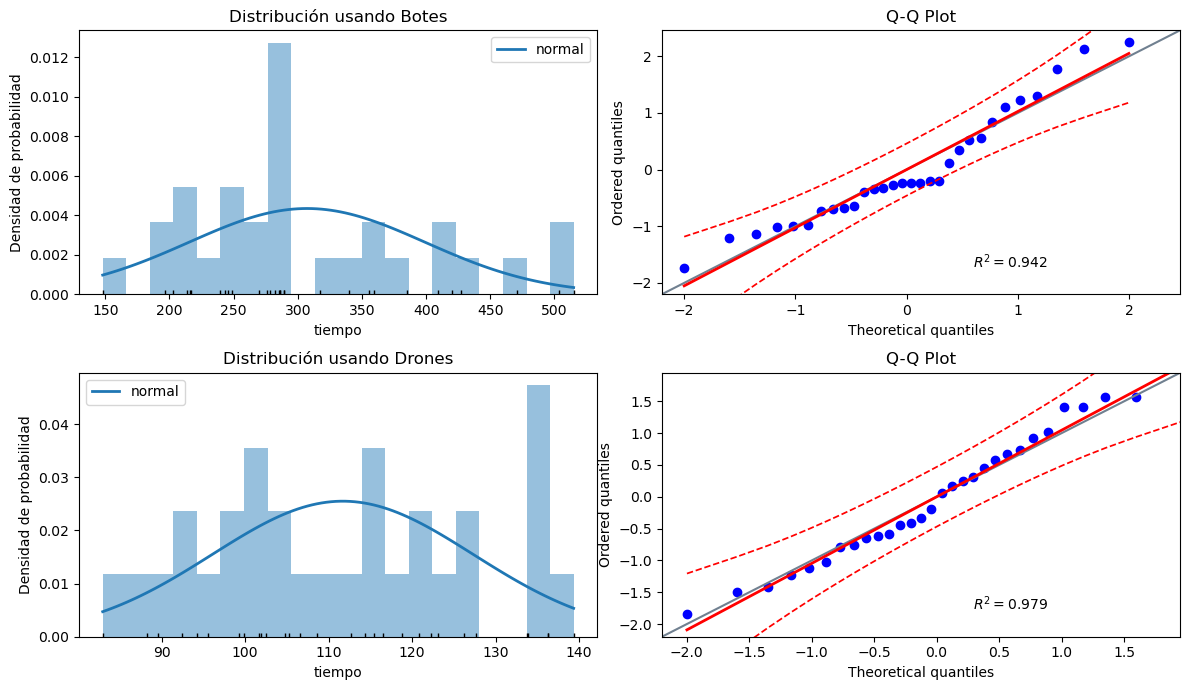

In [51]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

# Valores de la media (mu) y desviación típica (sigma)
mu, sigma = stats.norm.fit(datos['TMI_antes'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(datos['TMI_antes']), max(datos['TMI_antes']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=datos['TMI_antes'], density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(datos['TMI_antes'], np.full_like(datos['TMI_antes'], -0.0), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución usando Botes')
axs[0, 0].set_xlabel('tiempo')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot
pg.qqplot(datos['TMI_antes'], dist='norm', ax=axs[0, 1])

mu, sigma = stats.norm.fit(datos['TMI_despues'])
x_hat = np.linspace(min(datos['TMI_despues']), max(datos['TMI_despues']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=datos['TMI_despues'], density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(datos['TMI_despues'], np.full_like(datos['TMI_despues'], -0.0), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución usando Drones')
axs[1, 0].set_xlabel('tiempo')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(datos['TMI_despues'], dist='norm', ax=axs[1, 1])
plt.tight_layout();

In [52]:
# Test de normalidad Shapiro-Wilk aplicado a sistema de botes
# ==============================================================================
pg.normality(data=datos['TMI_antes'])

,W,pval,normal
TMI_antes,0.937475,0.077789,True


De acuerdo al resultado obtenido, los datos obtenidos no se distribuyen normalmente.

In [53]:
# Test de normalidad Shapiro-Wilk aplicado a sistema de drones
# ==============================================================================
pg.normality(data=datos['TMI_despues'])

,W,pval,normal
TMI_despues,0.966104,0.43875,True


De acuerdo al resultado obtenido, los datos no se distribuyen normalmente.

In [54]:
# Test para datos dependientes (p-value, intervalos de confianza)
# ==============================================================================

pg.ttest(
    x           = datos['TMI_antes'],
    y           = datos['TMI_despues'],
    alternative = 'two-sided',
    paired      = True,
    correction  = False
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,11.226617,29,two-sided,4.490120e-12,"[159.9, 231.14]",2.913961,1.906e+09,1.0


**El p-value obtenido por el t-test pareado es inferior al nivel de significancia establecido** ( 𝑎𝑙𝑝ℎ𝑎=0.05 ), por lo cual, se rechaza la hipótesis nula en favor de la hipótesis alternativa, esto quiere decir que el rendimiento del modelo ha cambiado (mejorado).